## Importing neccessary modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [2]:
data=pd.read_csv(r"D:\Data Science\Course 10\DS2_C6_S2_CarSales_Data_Challenge.csv")
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


### Preprocessing

In [3]:
df=data.drop("__year_resale_value",axis=1)
df.isna().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
Latest_Launch         0
Power_perf_factor     2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    object 
 4   Price_in_thousands  155 non-null    float64
 5   Engine_size         156 non-null    float64
 6   Horsepower          156 non-null    float64
 7   Wheelbase           156 non-null    float64
 8   Width               156 non-null    float64
 9   Length              156 non-null    float64
 10  Curb_weight         155 non-null    float64
 11  Fuel_capacity       156 non-null    float64
 12  Fuel_efficiency     154 non-null    float64
 13  Latest_Launch       157 non-null    object 
 14  Power_perf_factor   155 non-null    float64
dtypes: float64(11), object(4)
memory usage: 18.5+ KB


In [5]:
cols=df.select_dtypes(include="float64").columns
for item in cols:
    df[item].fillna(df[item].mean(),inplace=True)
df.isna().sum()    

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [6]:
scaler=MinMaxScaler()
encoder=LabelEncoder()

df_scaled=pd.DataFrame(scaler.fit_transform(df.loc[:,cols]),columns=cols)

for item in cols:
    df[item]=df_scaled[item]
cols=df.select_dtypes(include="object").columns

for item in cols:
    df[item]=encoder.fit_transform(df[item])
    
df.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0,79,0.031102,1,0.160821,0.114286,0.215190,0.186551,0.271676,0.306258,0.202339,0.133641,0.433333,47,0.212314
1,0,143,0.072669,1,0.251295,0.314286,0.430380,0.336226,0.445087,0.579228,0.441120,0.317972,0.333333,93,0.413024
2,0,25,0.025912,1,0.238061,0.314286,0.430380,0.310195,0.462428,0.567244,0.428338,0.317972,0.366667,9,0.326123
3,0,115,0.015687,1,0.429620,0.357143,0.392405,0.477223,0.508671,0.628495,0.531683,0.354839,0.233333,52,0.413140
4,1,8,0.037537,1,0.193470,0.114286,0.240506,0.216920,0.323699,0.380826,0.299973,0.281106,0.400000,20,0.239594


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Manufacturer,157.0,14.515924,8.595322,0.0,7.000000,15.000000,21.000000,29.0
Model,157.0,77.668790,45.082032,0.0,39.000000,78.000000,116.000000,155.0
Sales_in_thousands,157.0,0.097859,0.125875,0.0,0.025912,0.054288,0.125536,1.0
Vehicle_type,157.0,0.738854,0.440665,0.0,0.000000,1.000000,1.000000,1.0
Price_in_thousands,157.0,0.238061,0.186971,0.0,0.116829,0.185734,0.297581,1.0
Engine_size,157.0,0.294414,0.148757,0.0,0.185714,0.285714,0.357143,1.0
Horsepower,157.0,0.331516,0.143084,0.0,0.240506,0.316456,0.405063,1.0
Wheelbase,157.0,0.322932,0.165223,0.0,0.225597,0.312364,0.425163,1.0
Width,157.0,0.494220,0.198890,0.0,0.335260,0.462428,0.624277,1.0
Length,157.0,0.505241,0.178277,0.0,0.375499,0.511318,0.621838,1.0


In [8]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [9]:
k=np.arange(2,8)
scores=[]
garb=10000000
for k in k:
    model=KMeans(n_clusters=k)
    clusters=model.fit_predict(df)
    scores.append((k,model.inertia_,silhouette_score(df,clusters)))    

In [10]:
print("Best K value and score :",sorted(scores, key=lambda x: x[2],reverse=False)[0])

Best K value and score : (7, 86040.3971522552, 0.33905853983504797)


### Model Building

In [11]:
model=KMeans(n_clusters=4)
clusters=model.fit_predict(df)

data["clusters"]=clusters

In [12]:
clust_count=[]
for item in set(clusters):
    print("Cluster :",item)
    clust_count.append(len(data.Model[data.clusters==item].unique()))
    print(data.Model[data.clusters==item].unique(),"\n")

Cluster : 0
['Integra' 'RL' 'Park Avenue' 'Malibu' 'Monte Carlo' 'Metro'
 'Sebring Coupe' 'Sebring Conv.' 'Neon' 'Stratus' 'Ram Pickup' 'Ram Wagon'
 'Mustang' 'Taurus' 'Windstar' 'Ranger' 'Passport' 'Odyssey' 'S-Type'
 'Wrangler' 'LS400' 'LX470' 'RX300' 'Navigator' 'Montero' 'Mystique'
 'Mountaineer' 'Villager' 'SL-Class' 'SLK' 'M-Class' 'Quest' 'Xterra'
 'Intrigue' 'Sunfire' 'SC' 'SW' 'LS' 'Sienna' 'Passat' 'S40' 'S70' 'S80'] 

Cluster : 1
['TL' 'Regal' 'LeSabre' 'Seville' 'Lumina' 'Prizm' 'LHS' 'Town & Country'
 'Viper' 'Ram Van' 'Sonata' 'Town car' 'Mirage' 'Montero Sport' 'Sable'
 'S-Class' 'SLK230' 'Sentra' 'Maxima' 'Pathfinder' 'Silhouette' 'Neon'
 'Voyager' 'Prowler' 'Montana' 'SL' 'LW' 'Outback' 'Tacoma' 'RAV4'
 'Land Cruiser' 'Jetta' 'V40' 'V70'] 

Cluster : 2
['A6' '323i' '528i' 'Catera' 'Escalade' 'Cavalier' 'Corvette' 'Impala'
 'Concorde' 'Avenger' 'Intrepid' 'Durango' 'Caravan' 'Contour' 'Focus'
 'Crown Victoria' 'Explorer' 'Expedition' 'F-Series' 'Accord' 'Accent'
 'I30' 

In [13]:
import matplotlib.pyplot as plt

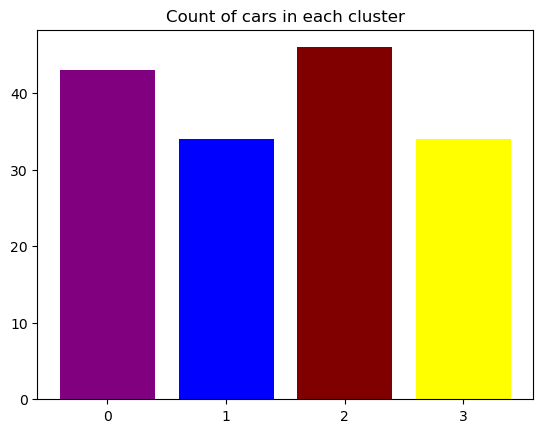

In [14]:
plt.bar("0 1 2 3".split(" "),clust_count,color= ['purple', 'blue', 'maroon', 'yellow'])
plt.title("Count of cars in each cluster")
plt.show()